In [1]:
import pandas as pd 
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1['area_type'].value_counts() 

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
## Drop the columns that are not too much important for the output

df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data Preprocessing

#### Handling Missing Value

In [6]:
df2.isnull().sum()  ## Checking the null values

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

#### Hence the misiing raws are less campared to the shape of the dataset. Hence decided to drop the raws

In [7]:
df3 = df2.dropna() ## Drop the missing values
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
## Create New column 'bhk' where the size is converted into 2 token and taken
## by a space and take first token

df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0])) 
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
## function is to check whether a given input x can be converted 
## to a floating-point number.

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [12]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [13]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
df4 = df3.copy()
df4 ['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## Feature Engineering

In [15]:
## Create new column price_per_sqft

df5 = df4.copy()
df5['price_per_sqft'] = 100000*df5['price']/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [16]:
len(df5['location'].value_counts())

1304

In [17]:
location_stats = df5['location'].value_counts()
location_stats

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [18]:
location_stats[location_stats<=10].count()

1063

In [19]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Dairy Circle         10
Kalkere              10
Dodsworth Layout     10
Sadashiva Nagar      10
Naganathapura        10
                     ..
Vidyapeeta            1
Maruthi Extension     1
Okalipura             1
Old Town              1
Abshot Layout         1
Name: location, Length: 1063, dtype: int64

In [20]:
## Location less than 10  are collected to other other category
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.value_counts())

242

### Outlier Removal (Using Standard Deviation)

In [21]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [22]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)] ## Removing the outliers where total_sqft per bhk less than 300
df6.shape

(12502, 7)

In [23]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [24]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()  # Create an empty DataFrame to store the filtered data
    for key, subdf in df.groupby('location'):
        # Group the DataFrame by 'location' and iterate through each group
        m = np.mean(subdf.price_per_sqft)  # Calculate the mean of 'price_per_sqft' for the current location
        st = np.std(subdf.price_per_sqft)  # Calculate the standard deviation of 'price_per_sqft' for the current location
        
        # Filter the data within one standard deviation from the mean
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)  # Concatenate the filtered data to the output DataFrame
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10244, 7)

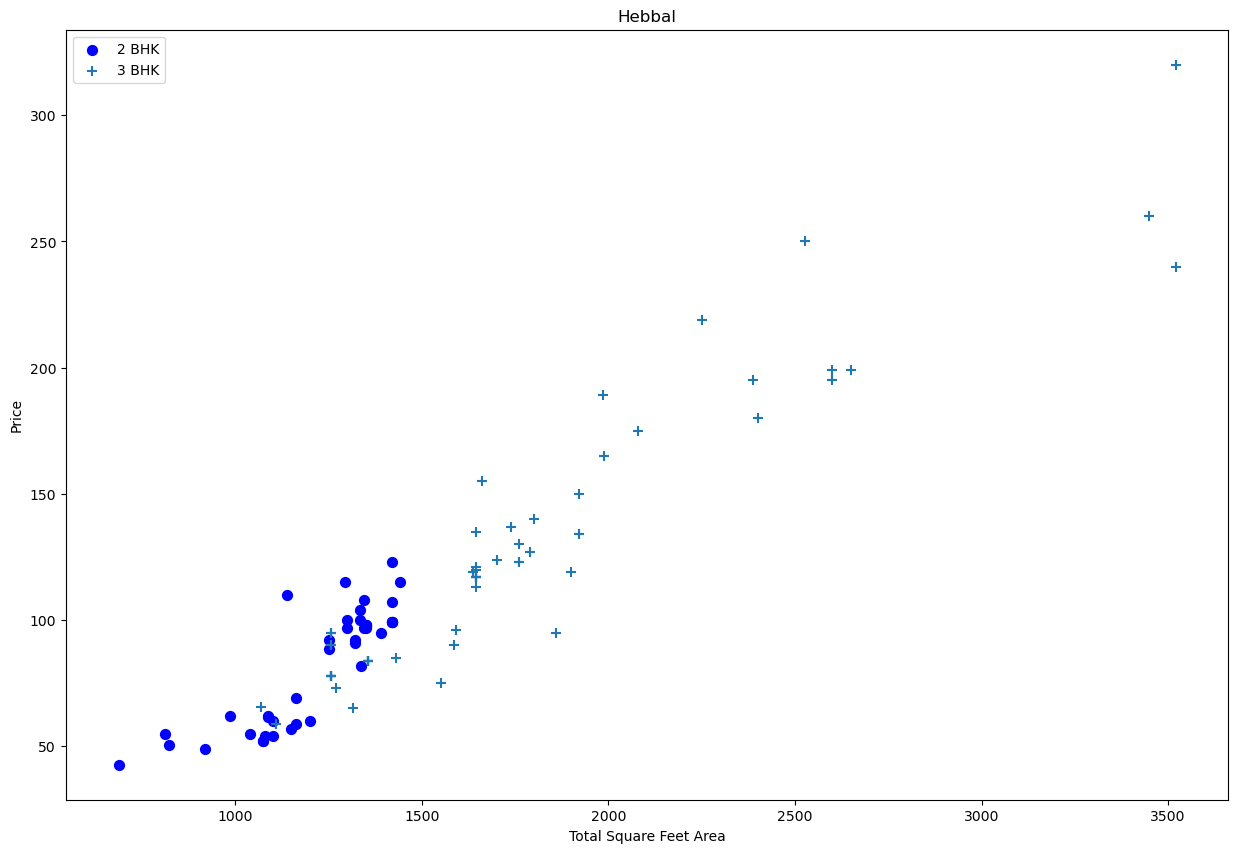

In [25]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue',label = '2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = '+',label = '3 BHK',s=50)
    
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,'Hebbal')

### Remove the 2 BHK apartments whose price_per_sqft is less than mean price of 1 BHK apartment

In [26]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])  # Create an empty NumPy array to store indices of outliers to be excluded
    for location, location_df in df.groupby('location'):
        bhk_stats = {}  # Create an empty dictionary to store statistics for each BHK in the current location
        for bhk, bhk_df in location_df.groupby('bhk'):
            # Calculate mean, standard deviation, and count for 'price_per_sqft' for each BHK configuration
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)  # Get statistics for the BHK configuration one less than the current
            if stats and stats['count'] > 5:
                # Exclude indices of data points where 'price_per_sqft' is less than the mean of the previous BHK configuration
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')  # Drop the rows with outlier indices and return the modified DataFrame

df8 =  remove_bhk_outliers(df7)
df8.shape

(7342, 7)

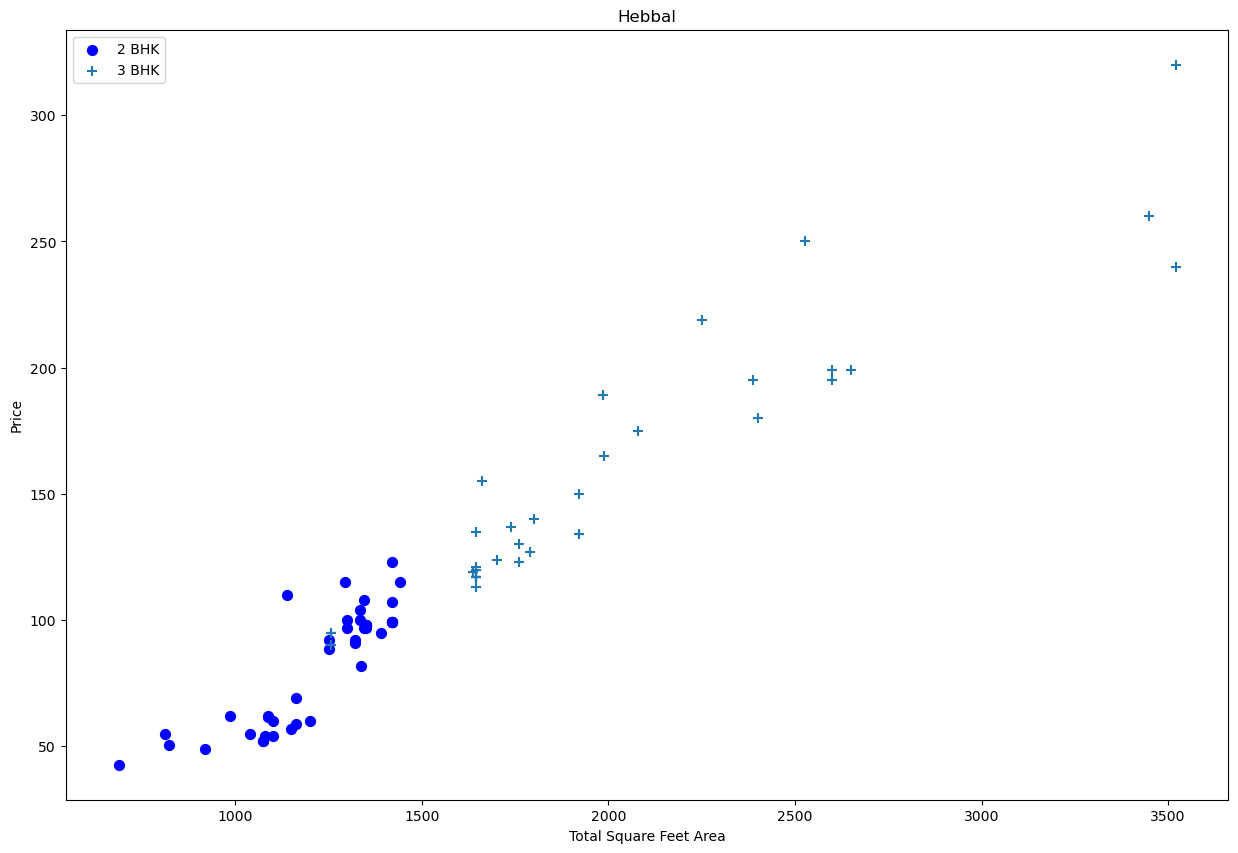

In [27]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'Count')

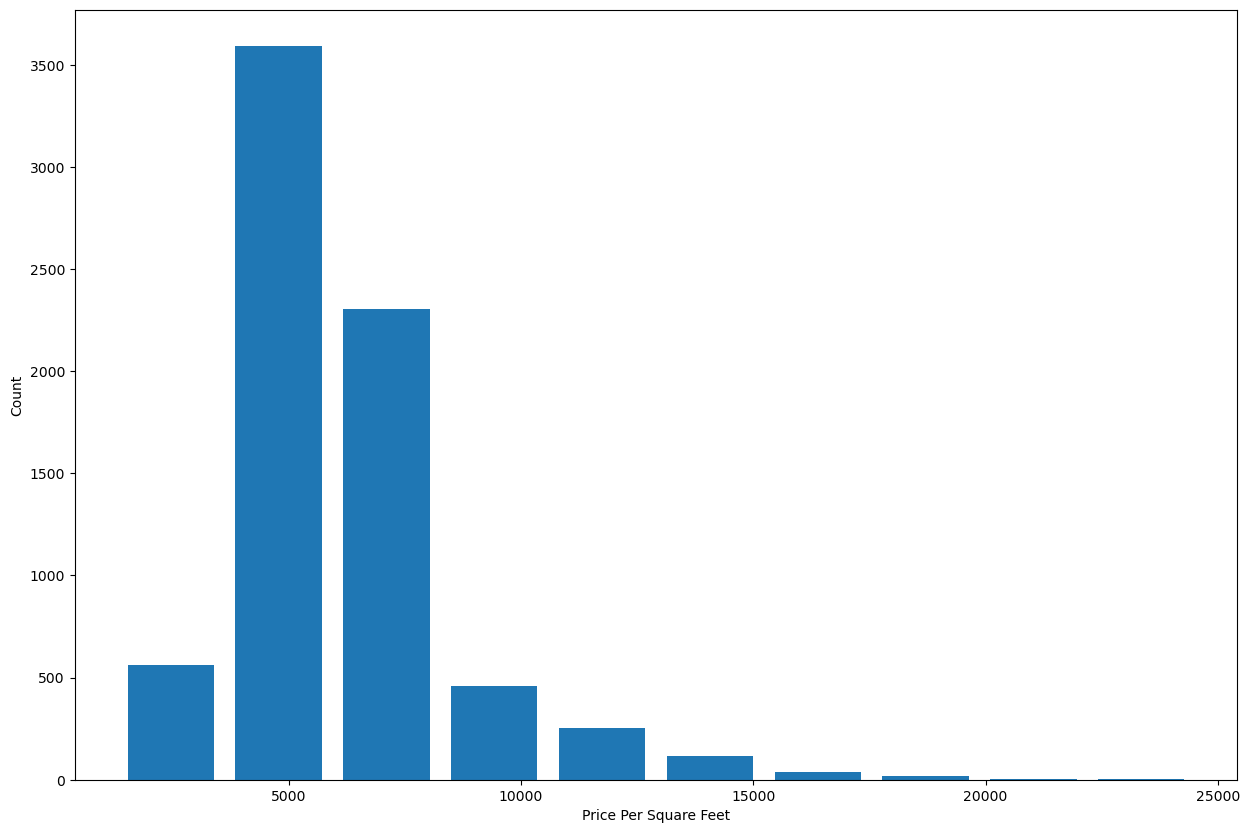

In [28]:
plt.hist(df8.price_per_sqft,rwidth=0.8)

plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

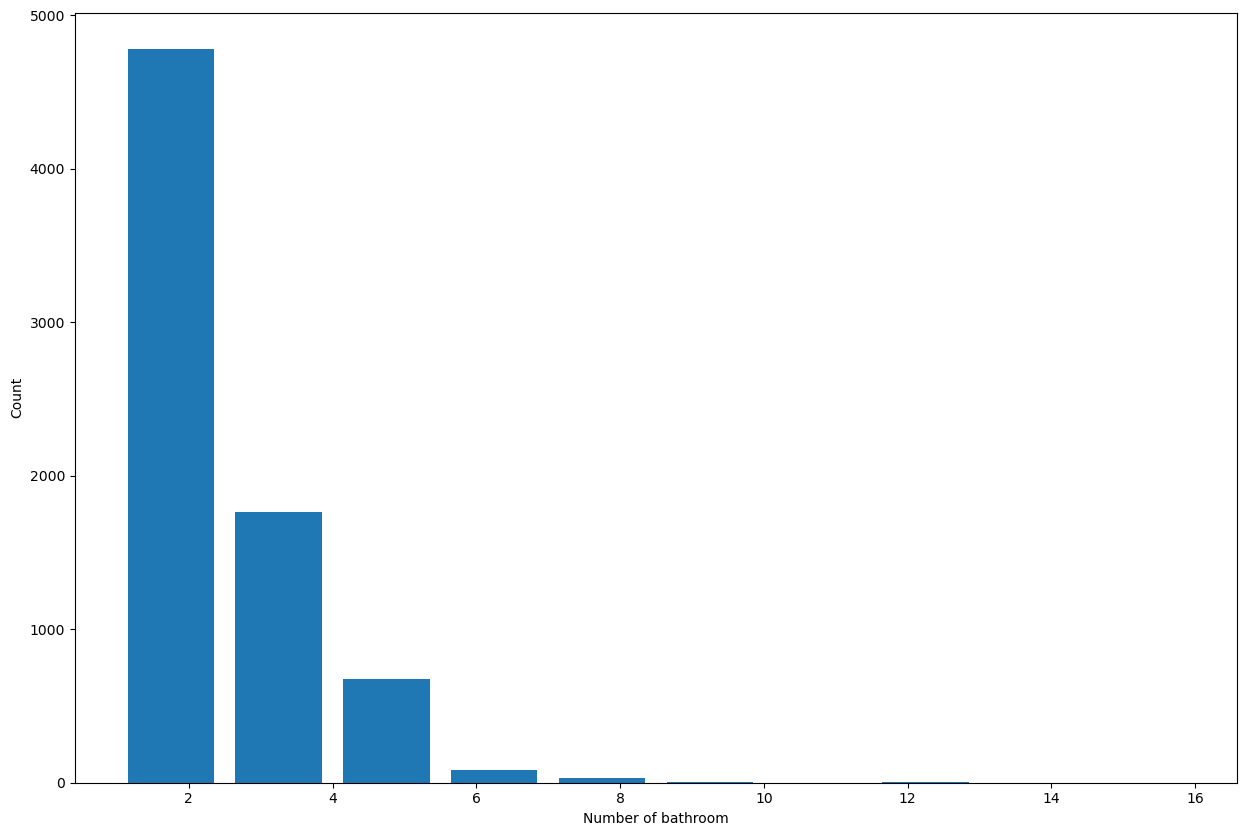

In [29]:
plt.hist(df8.bath,rwidth=0.8)

plt.xlabel('Number of bathroom')
plt.ylabel('Count')

In [30]:
## Removing No of bathroom +2 grater than no of bedroom

df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [31]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7264, 7)

In [32]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699


In [33]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [34]:
dummies=pd.get_dummies(df10.location)
dummies.head(10)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df12.shape

(7264, 245)

## Model Building

In [38]:
X = df12.drop('price',axis='columns')
y = df12.price

In [39]:
## Splitting Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


linear_Reg = LinearRegression()
linear_Reg.fit(X_train, y_train)

# Predictions on the test set
y_pred = linear_Reg.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_absolute_percentage_error(y_test, y_pred)

print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean absolute percentage Error: {mse}')


R^2 Score: 0.8647928507271297
Mean Absolute Error: 17.874499077739596
Mean absolute percentage Error: 0.2215854669105395


## Evaluating the model

### Use K Fold cross validation

In [41]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82622151, 0.81408431, 0.87757267, 0.84822717, 0.86091226])

### Hyperparameter tuning

In [42]:
## Checking the best algorithm for the model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos = {
        'linear_regression':{
            'model' : LinearRegression(),
            'params' :{
                'fit_intercept': [True, False]
                
            }
        },
        'lasso':{
            'model' : Lasso(),
            'params' :{
                'alpha': [1,2],
                'selection' : ['random','cyclic']
            }
        },
        'decision_tree':{
            'model' : DecisionTreeRegressor(),
            'params' :{
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X_train,y_train)
        scores.append({
            'model' : algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [43]:
find_best_model(X_test,y_test)

,model,best_score,best_params
0,linear_regression,0.833171,{'fit_intercept': False}
1,lasso,0.696220,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.663459,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


## Model Creation

In [44]:


# Best parameters obtained from hyperparameter tuning
best_params = {'fit_intercept': True}

# Create LinearRegression model with the best parameters
model = LinearRegression(**best_params)

# Fit the model on the training data
model.fit(X_train, y_train)
r2_score(y_pred, y_test)

model

LinearRegression()

### Test the model for few properties

In [45]:
def predict_price(location, sqft, bath, bhk):
    # Find the index of the location in the feature columns
    loc_index = np.where(X.columns == location)[0][0]

    # Create an array with zeros, representing feature values
    x = np.zeros(len(X.columns))
    
    # Set the values for sqft, bath, and bhk in the array
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    # If the location is present in the features, mark it as 1 in the array
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]


In [46]:
predict_price('Indira Nagar',1000,2,2)

191.0873893346929

In [47]:
predict_price('1st Phase JP Nagar',1000,2,2)

88.52930125566529

### Export the model to a pickle file

In [48]:
import pickle
with open('bengaluru_house_prices.pickle','wb') as f:
    pickle.dump(model,f)

In [49]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open ('columns.json','w') as f:
    f.write(json.dumps(columns))  
    ## Convert the dictionary 'columns' to a JSON-formatted string